# Çok Özellikli Lineer Regresyon ile Araba Satış Fiyat Tahmini

In [13]:
from sklearn.metrics import r2_score, mean_squared_error
import  pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from function import *

veriler = pd.read_csv('car_prices_numeric.csv')
print(f'Verilerin Boyutu: {veriler.shape}')

Verilerin Boyutu: (100000, 8)


In [14]:
X = np.array(veriler[['Year', 'Brand', 'Model', 'Mileage', 'Engine Size', 'Fuel Type', 'Transmission']])
y = np.array(veriler['Price'])

print(f'Özelliklerin Boyutu: {X.shape}')
print(f'Hedeflerin Boyutu: {y.shape}')

Özelliklerin Boyutu: (100000, 7)
Hedeflerin Boyutu: (100000,)


In [15]:
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

In [16]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.6, random_state=42)

print(f'Eğitim (Özellik) Verilerinin Boyutu: {X_train.shape}, Eğitim (Hedef) Verilinin Boyutu: {y_train.shape}')
print(f'Test (Özellik) Verilerinin Boyutu: {X_test.shape}, Test (Hedef) Verilinin Boyutu: {y_test.shape}')

Eğitim (Özellik) Verilerinin Boyutu: (40000, 7), Eğitim (Hedef) Verilinin Boyutu: (40000,)
Test (Özellik) Verilerinin Boyutu: (60000, 7), Test (Hedef) Verilinin Boyutu: (60000,)


In [25]:
n = X_train.shape[1]
w = np.zeros((n))
b = np.random.rand()
alpha = 0.1
iterations = 1000

w_final, b_final, hist_J = run(X_train, y_train, w, b, linearFunction, costFunction, gradientFunction, alpha, iterations)

Iteration: 0, Cost: 0.5347
Iteration: 100, Cost: 0.4198
Iteration: 200, Cost: 0.4198
Iteration: 300, Cost: 0.4198
Iteration: 400, Cost: 0.4198
Iteration: 500, Cost: 0.4198
Iteration: 600, Cost: 0.4198
Iteration: 700, Cost: 0.4198
Iteration: 800, Cost: 0.4198
Iteration: 900, Cost: 0.4198
Final Weights: [-0.27922699 -0.27922699 -0.27922699 -0.27922699 -0.27922699 -0.27922699
 -0.27922699]
Final Bias: -0.004112811432591819
Prediction: -0.01587175288154194, Target: 1.3752017737713895
Prediction: -0.33291255875968656, Target: -1.1981322564648378
Prediction: 0.12908694913222926, Target: -0.042930431758413615
Prediction: -0.17687515067905504, Target: 1.2596661077463431
Prediction: -0.36433945733331446, Target: -0.8014283271541637


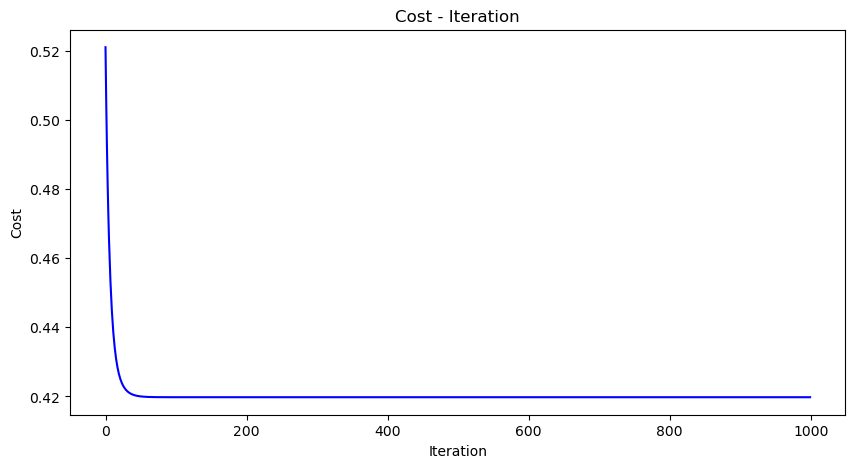

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(range(iterations), hist_J, color='blue')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost - Iteration")
plt.show()

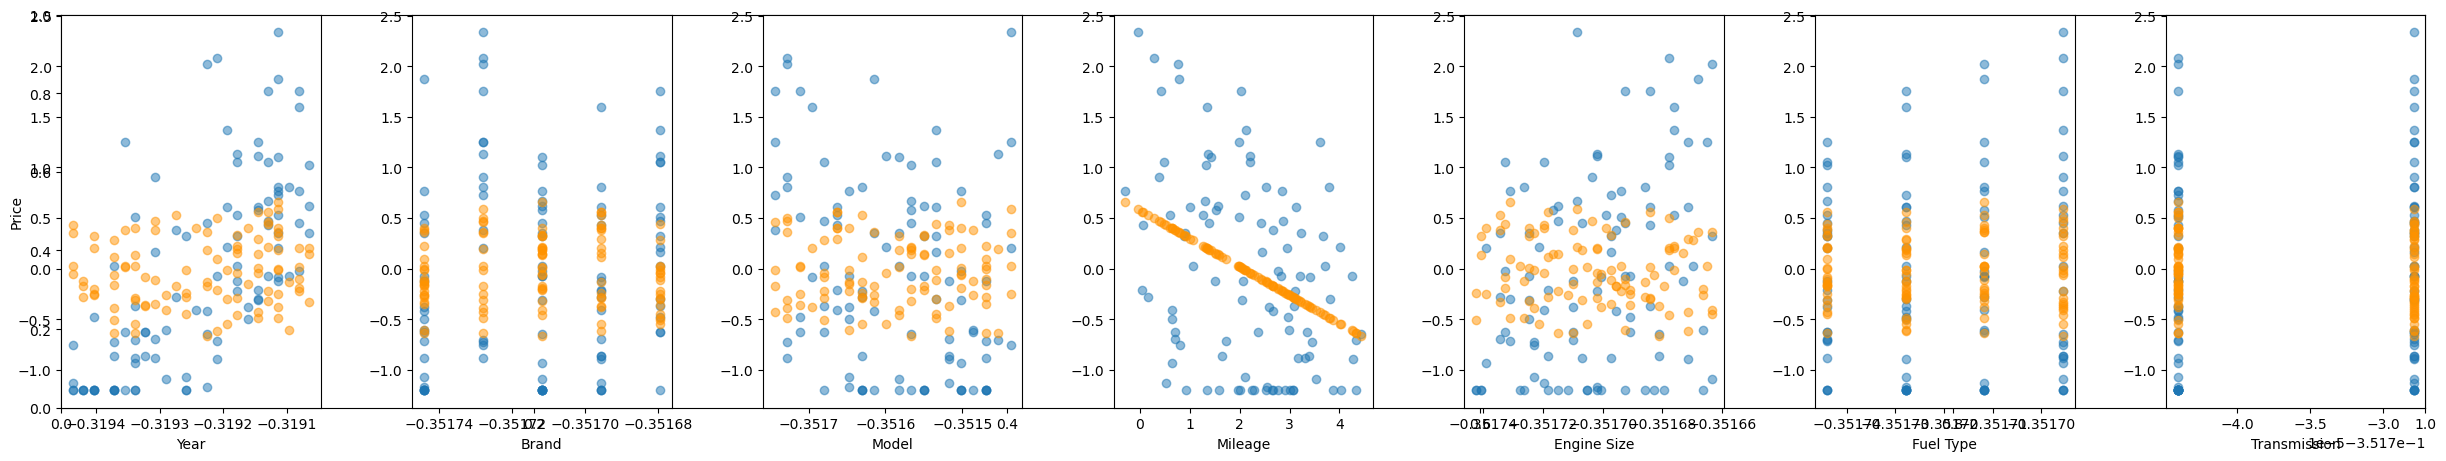

In [22]:
feature_names = ['Year', 'Brand', 'Model', 'Mileage', 'Engine Size', 'Fuel Type', 'Transmission']
n = X_train.shape[1]
y_pred_train = linearFunction(X_train, w_final, b_final)

plt.figure(figsize=(25, 5))
plt.ylabel("Price")
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.scatter(X_train[:100, i], y_train[:100], label="Train Data", alpha=0.5)
    plt.scatter(X_train[:100, i], y_pred_train[:100], color='#FF9300', label="Train Data Prediction", alpha=0.5)
    plt.xlabel(feature_names[i])
plt.tight_layout()
plt.show()

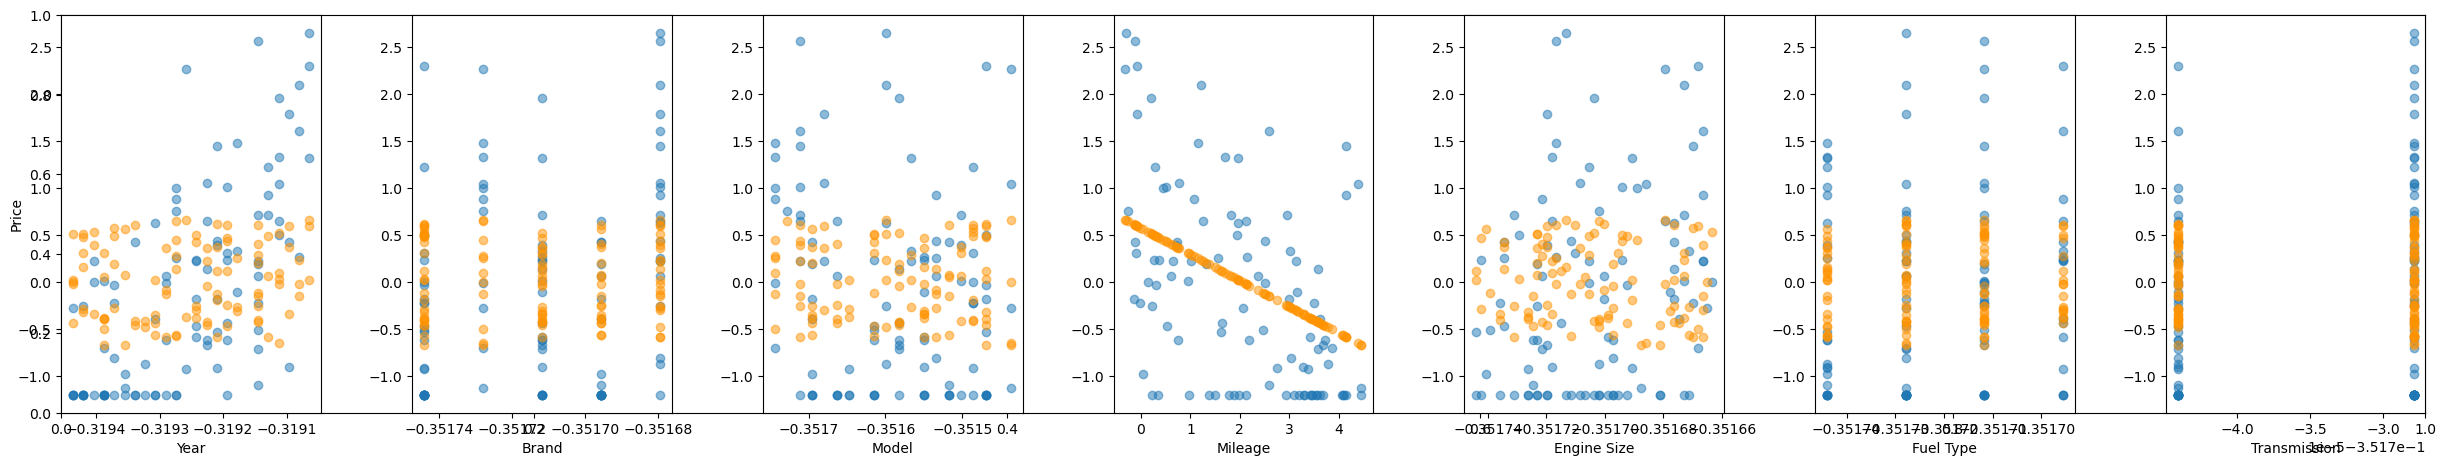

In [24]:
feature_names = ['Year', 'Brand', 'Model', 'Mileage', 'Engine Size', 'Fuel Type', 'Transmission']
n = X_test.shape[1]
y_pred_test = linearFunction(X_test, w_final, b_final)

plt.figure(figsize=(25, 5))
plt.ylabel("Price")
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.scatter(X_test[:100, i], y_test[:100], label="Test Data", alpha=0.5)
    plt.scatter(X_test[:100, i], y_pred_test[:100], color='#FF9300', label="Test Data Prediction", alpha=0.5)
    plt.xlabel(feature_names[i])
plt.tight_layout()
plt.show()

In [21]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("📊 Model Başarı Oranı 📊")
print(f"🔹 Eğitim Verileri:")
print(f"   - MSE: {mse_train:.4f}")
print(f"   - RMSE: {rmse_train:.4f}")
print(f"   - R² Skoru: {r2_train:.4f}")

print(f"🔹 Test Verileri:")
print(f"   - MSE: {mse_test:.4f}")
print(f"   - RMSE: {rmse_test:.4f}")
print(f"   - R² Skoru: {r2_test:.4f}")


📊 Model Başarı Oranı 📊
🔹 Eğitim Verileri:
   - MSE: 0.8395
   - RMSE: 0.9163
   - R² Skoru: 0.1546
🔹 Test Verileri:
   - MSE: 0.8493
   - RMSE: 0.9216
   - R² Skoru: 0.1545
